# A3

In [1]:
# Import modules
import numpy as np
from numpy import array
import matplotlib.pylab as plt
%matplotlib inline
import network as Network
from network import OneHot
import copy
import math

# Q1: Softmax Gradient

\begin{align}
\frac{\partial E}{\partial z_j} & = \frac{\partial}{\partial z_j}\left( - \sum_{k = 1}^{K} t_k \ln y_k \right) \\
& = - \sum_{k = 1}^{K} t_k \frac{\partial}{\partial z_j} \ln y_k \\
& = - \sum_{k = 1}^{K} \frac{t_k}{y_k} \frac{\partial y_k}{\partial z_j} \\
& = - \sum_{k \neq j}\left[ \frac{t_k}{y_k} \left(- y_k y_j\right)\right]  - \frac{t_j}{y_j} y_j\left(1 - y_j\right)\\
& = \sum_{k \neq j} \left( t_k y_j \right)  + t_j \left(y_j - 1\right)\\
& = \sum_{k = 1}^{K} \left( t_k y_j \right)  - t_j \\
& = y_j - t_j \\
\end{align}

Note that, for the forth equality, when $k \neq j$

\begin{align}
\frac{\partial y_k}{\partial z_j} = \frac{- e^{z_k}e^{z_j}}{(\sum_{i = 1}^{K}e^{z_i})^2} = -y_k y_j
\end{align}

when $k = j$
\begin{align}
\frac{\partial y_j}{\partial z_j} = \frac{e^{z_j}(\sum_{i = 1}^{K}e^{z_i}) - e^{z_j}e^{z_j}}{(\sum_{i = 1}^{K}e^{z_i})^2} = y_j(1 - y_j)
\end{align}

# Q2: Vanishing Gradient

## (a) Proof that $\left| w \right| \geq 4$

Note that, for $y = \sigma(x)$:
\begin{align}
\sigma^{\prime}(x) & = y(1 - y) \\
& = - (y - \frac12)^2 + \frac14 \\
& \leq \frac14
\end{align}

Thus, 

\begin{align}
\left| w\sigma^{\prime}(wh + b)\right| & = \left| w \right| \left| \sigma^{\prime}(wh + b)\right| \\
& \leq \frac14 \left| w \right|
\end{align}

Thus $\left| w\sigma^{\prime}(wh + b)\right| \geq 1$ implies $\left| w \right| \geq 4$.


## (b) The Width of Interval

Note that
\begin{align}
\sigma^{\prime}(x) = \sigma(x) (1 - \sigma(x))
\end{align}

Denote $\sigma(wh + b) = y$. Thus we first solve the following inequality

\begin{align}
\left| wy(1 - y)\right| \geq 1
\end{align}

Note that $y \in (0, 1)$. Thus it is equivalent to the following inequality

\begin{align}
y(1 - y) \geq \frac{1}{\left| w \right|}
\end{align}


which is a quadratic inequation, in terms of $y$. Applying formula, y must satisfy

\begin{align}
\frac{1 - \sqrt{1 - \frac{4}{\left| w \right|}}}{2} \leq y \leq \frac{1 + \sqrt{1 - \frac{4}{\left| w \right|}}}{2}
\end{align}

which means

\begin{align}
\frac{1 - \sqrt{1 - \frac{4}{\left| w \right|}}}{2} \leq \frac{1}{1 + e^{-(wh + b)}} \leq \frac{1 + \sqrt{1 - \frac{4}{\left| w \right|}}}{2}
\end{align}

solve the above inequaltion, we get

\begin{align}
- b - \ln\left[\frac{\left| w \right|}{2} \left( 1 + \sqrt{1 - \frac{4}{\left| w \right|}}\right) - 1\right] \leq wh \leq - b - \ln\left[\frac{\left| w \right|}{2} \left( 1 - \sqrt{1 - \frac{4}{\left| w \right|}}\right) - 1\right]
\end{align}

To solve the range of $h$, we need to discuss whether $w$ is positive or negative. But in both case, the width of the interval is

\begin{align}
\frac{1}{\left| w \right|}\left\{\ln\left[\frac{\left| w \right|}{2} \left( 1 + \sqrt{1 - \frac{4}{\left| w \right|}}\right) - 1\right] - \ln\left[\frac{\left| w \right|}{2} \left( 1 - \sqrt{1 - \frac{4}{\left| w \right|}}\right) - 1\right]\right\}
\end{align}

Note that

\begin{align}
& \ln\left[\frac{\left| w \right|}{2} \left( 1 + \sqrt{1 - \frac{4}{\left| w \right|}}\right) - 1\right] + \ln\left[\frac{\left| w \right|}{2} \left( 1 - \sqrt{1 - \frac{4}{\left| w \right|}}\right) - 1\right] \\
& = \ln\left[\left(\frac{\left| w \right|}{2} - 1 \right)^2 - \left( \frac{\left| w \right|}{2}\sqrt{1 - \frac{4}{\left| w \right|}}\right)^2 \right] \\
& = \ln1 \\
& = 0
\end{align}

Thus

\begin{align}
& \ln\left[\frac{\left| w \right|}{2} \left( 1 + \sqrt{1 - \frac{4}{\left| w \right|}}\right) - 1\right] - \ln\left[\frac{\left| w \right|}{2} \left( 1 - \sqrt{1 - \frac{4}{\left| w \right|}}\right) - 1\right] \\
& = 2 \ln\left[\frac{\left| w \right|}{2} \left( 1 + \sqrt{1 - \frac{4}{\left| w \right|}}\right) - 1\right]
\end{align}


Thus, the width of the interval is

\begin{align}
\frac{2}{\left| w \right|}\ln\left[\frac{\left| w \right|}{2} \left( 1 + \sqrt{1 - \frac{4}{\left| w \right|}}\right) - 1\right]
\end{align}

## (c) Plot

It is obvious that the width is a even function of $w$. The function is symmetric respect to y-axis.

Thus, it is sufficient to show the case of $w \geq 0$.

The peak is around w = 6.89


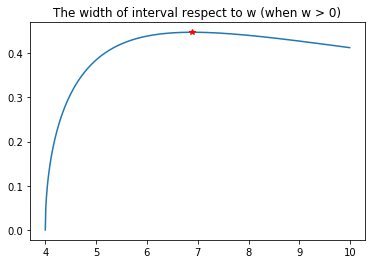

In [2]:
w = np.arange(4, 10, 0.01)
l = 2 / np.fabs(w) * np.log(np.fabs(w) / 2 * (1 + np.sqrt(1 - 4 / np.fabs(w))) - 1)

index = np.argmax(l)

plt.plot(w, l)
plt.plot(w[index], l[index], 'r*')
plt.title('The width of interval respect to w (when w > 0)')

print('The peak is around w = ' + str(w[index]))


# Q3: Dropout

## Dataset

In [3]:
# Training data
train = []
train.append([array([-1.]), array([-0.5]), array([0.]), array([0.5]), array([1.])])
train.append([array([0.98175791]),
 array([0.97127121]),
 array([0.73814758]),
 array([0.54656204]),
 array([0.49612656])])

# Test data
test = []
test.append([array([-0.71547508]),
 array([-0.71525103]),
 array([0.70006869]),
 array([0.1352368]),
 array([0.47569314]),
 array([-0.81833529]),
 array([0.12980741]),
 array([-0.02038187]),
 array([-0.27138016]),
 array([-0.34320815]),
 array([-0.05160956]),
 array([-0.694832]),
 array([0.32680181]),
 array([0.42661502]),
 array([-0.76748773]),
 array([0.03846209]),
 array([0.74080904]),
 array([-0.91080543]),
 array([-0.51337746]),
 array([-0.02761789]),
 array([0.63746432]),
 array([0.62230435]),
 array([0.48760244]),
 array([0.44593191]),
 array([-0.6465039]),
 array([0.78811405]),
 array([0.0406877]),
 array([-0.80486387]),
 array([0.96078017]),
 array([-0.99481486])])
test.append([array([0.87856333]),
 array([0.9804519]),
 array([0.43763465]),
 array([0.62553657]),
 array([0.55139782]),
 array([0.97171488]),
 array([0.69101347]),
 array([0.70832307]),
 array([0.66112479]),
 array([0.97994235]),
 array([0.72243856]),
 array([0.87817955]),
 array([0.68021256]),
 array([0.6609707]),
 array([0.87250947]),
 array([0.64903096]),
 array([0.50505284]),
 array([0.72561837]),
 array([0.88984239]),
 array([0.79125797]),
 array([0.58700936]),
 array([0.49905846]),
 array([0.62142599]),
 array([0.61545669]),
 array([0.7636149]),
 array([0.3739272]),
 array([0.74700192]),
 array([1.06842443]),
 array([0.58455839]),
 array([0.98525384])])

## Extend the Network class

In [6]:
from IPython.display import display
from ipywidgets import FloatProgress  

class RobustNetwork(Network.Network):
    def FeedForward(self, x, dropout=False):
        '''
            y = net.FeedForward(x, dropout=False)

            Runs the network forward, starting with x as input.
            However, a random half of the hidden nodes are set to 0 activity.
            Returns the activity of the output layer.

            Note: The activation function used for hidden layers depends
            on what self.Activation is set to. And the activation function for
            the output layer depends on what self.OutputActivation is set to.
        '''
        
        ### YOUR CODE HERE
        self.h[0] = x
        
        for l in range(1, self.n_layers):

            '''
            if l > 1 and dropout == True:
                z = np.dot(self.W[l - 1], self.h[l - 1] * (np.random.rand(self.h[l - 1].shape[0]) > 0.5)) + self.b[l]
            else:
                z = np.dot(self.W[l - 1], self.h[l - 1]) + self.b[l]
            '''

            z = np.dot(self.W[l - 1], self.h[l - 1]) + self.b[l]            
            
            if l < self.n_layers - 1:
                self.h[l] = self.Activation(z)
            else:
                self.h[l] = self.OutputActivation(z)
            
            # Divide the activation by 2 to avoid overflow
            # It does not change the behaviour of original net since it is equivalent to 
            # change the learning step
            
            self.h[l] = self.h[l] / 2
            
            if l < self.n_layers - 1 and dropout == True:
                self.h[l] = self.h[l] * (np.random.rand(self.h[l].shape[0]) > 0.5)
                # compensate 
                self.h[l] = self.h[l] * 2

        return self.h[-1]

 

## Create the Network

In [11]:
#original_net = Network.Network([1, 200, 1], type = 'regression')
#robust_net = RobustNetwork([1, 200, 1], type = 'regression')

original_net = RobustNetwork([1, 100, 1], type = 'regression')
robust_net = copy.deepcopy(original_net)


## (c) Train and Evaluate without dropout

In [12]:
original_net.Learn(train, epochs = 3000, lrate = 0.0005, dropout = False, progress = True)

print('Training MSE = ' + str(original_net.Evaluate(train)))
print('Test MSE = ' + str(original_net.Evaluate(test)))

A Jupyter Widget

Training MSE = 0.000587106173311
Test MSE = 0.00426680275357


## (d) Train and Evaluate with dropout

In [13]:
robust_net.Learn(train, epochs = 3000, lrate = 0.0005, dropout = True, progress = True)

print('Training MSE = ' + str(robust_net.Evaluate(train)))
print('Test MSE = ' + str(robust_net.Evaluate(test)))

A Jupyter Widget

Training MSE = 0.00121338758101
Test MSE = 0.00405103153143


## (e) Plot training data and models

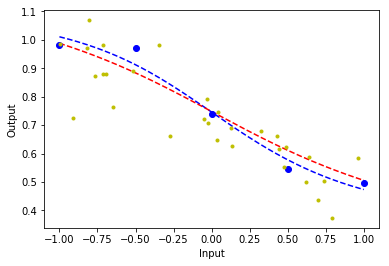

In [14]:
# The calculate the line of each model
s = np.linspace(-1, 1, 200)
original = [original_net.FeedForward([x]) for x in s]
robust = [robust_net.FeedForward([x]) for x in s]

# Plot the data and models
plt.plot(s, original, 'b--')
plt.plot(s, robust, 'r--')

plt.plot(train[0], train[1], 'bo')
plt.plot(test[0], test[1], 'y.')

plt.xlabel('Input')
plt.ylabel('Output');

# Q4: Deep Networks

## Create and interesting dataset

In [261]:
# Three classes
# Training set
n_samples1 = 200
rho0 = 0.; sigma0 = 0.2
rho1 = 0.5; sigma1 = 0.1
rho2 = 0.9; sigma2 = 0.15
training_input = []
training_output = []
for n in range(n_samples1):
    rho = np.random.normal()*sigma0 + rho0
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    training_input.append(np.array([x,y]))
    training_output.append(np.array([1,0.,0]))

n_samples2 = 200
for n in range(n_samples2):
    rho = np.random.normal()*sigma1 + rho1
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    training_input.append(np.array([x,y]))
    training_output.append(np.array([0.,1,0]))

n_samples3 = 200
for n in range(n_samples3):
    rho = np.random.normal()*sigma2 + rho2
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    training_input.append(np.array([x,y]))
    training_output.append(np.array([0.,0,1]))

train = [np.array(training_input), np.array(training_output)]

# Test set
test_input = []
test_output = []
for n in range(n_samples1):
    rho = np.random.normal()*sigma0 + rho0
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    test_input.append(np.array([x,y]))
    test_output.append(np.array([1,0.,0]))

for n in range(n_samples2):
    rho = np.random.normal()*sigma1 + rho1
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    test_input.append(np.array([x,y]))
    test_output.append(np.array([0.,1,0]))

for n in range(n_samples3):
    rho = np.random.normal()*sigma2 + rho2
    theta = np.random.rand()*2.*np.pi
    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    test_input.append(np.array([x,y]))
    test_output.append(np.array([0.,0,1]))

test = [np.array(test_input), np.array(test_output)]

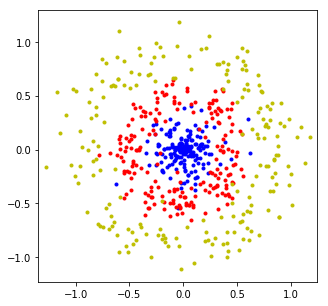

In [262]:
end1 = n_samples1
end2 = n_samples1+n_samples2
plt.figure(figsize=[5,5])
plt.plot(train[0][:end1,0], train[0][:end1,1], 'b.')
plt.plot(train[0][end1:end2,0], train[0][end1:end2,1], 'r.');
plt.plot(train[0][end2:,0], train[0][end2:,1], 'y.')
plt.axis('equal');

## (a) Create and Evaluate a Neural Network

In [271]:
net = Network.Network([2, 30, 10, 3], type = 'classifier')

print('Cross Entropy on Training Set = ' + str(net.Evaluate(train)))
print('Training Accuracy = ' + str(net.ClassificationAccuracy(train) * 100.) + '%')

print('Cross Entropy on Test Set = ' + str(net.Evaluate(test)))
print('Test Accuracy = ' + str(net.ClassificationAccuracy(test) * 100.) + '%')

Cross Entropy on Training Set = 3.51373016036
Training Accuracy = 33.33333333333333%
Cross Entropy on Test Set = 3.51257668742
Test Accuracy = 33.33333333333333%


## (b) Train the network

In [272]:
progress = net.SGD(train, epochs = 500, lrate = 0.5)


A Jupyter Widget

## (c) Evaluate trained network

In [273]:
print('Cross Entropy on Training Set = ' + str(net.Evaluate(train)))
print('Training Accuracy = ' + str(net.ClassificationAccuracy(train) * 100.) + '%')

print('Cross Entropy on Test Set = ' + str(net.Evaluate(test)))
print('Test Accuracy = ' + str(net.ClassificationAccuracy(test) * 100.) + '%')


Cross Entropy on Training Set = 0.372923315876
Training Accuracy = 92.83333333333333%
Cross Entropy on Test Set = 0.858109756519
Test Accuracy = 87.0%


## (d) Plot classification results

Text(0.5,1,'Classification Results on Test Data')

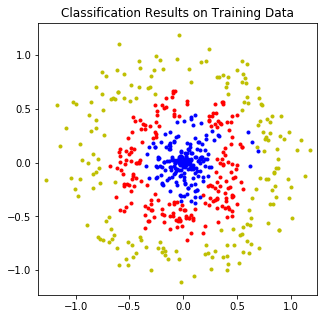

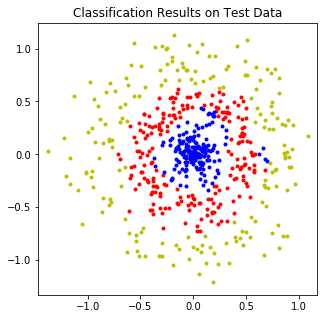

In [274]:
plt.figure(figsize=[5,5])

for x, t in zip(train[0], train[1]):
    y = net.FeedForward(x)
    yb = OneHot(y)
    if yb[0] == 1:
        plt.plot(x[0], x[1], 'b.')
    elif yb[1] == 1:
        plt.plot(x[0], x[1], 'r.')
    elif yb[2] == 1:
        plt.plot(x[0], x[1], 'y.')
    
plt.axis('equal');
plt.title('Classification Results on Training Data')


plt.figure(figsize=[5,5])

for x, t in zip(test[0], test[1]):
    y = net.FeedForward(x)
    yb = OneHot(y)
    if yb[0] == 1:
        plt.plot(x[0], x[1], 'b.')
    elif yb[1] == 1:
        plt.plot(x[0], x[1], 'r.')
    elif yb[2] == 1:
        plt.plot(x[0], x[1], 'y.')
    
plt.axis('equal');
plt.title('Classification Results on Test Data')
